Simple classification with Tensorflow
========

Bruno Sciolla, 2017

Tested with Tensorflow v.'0.11.0rc2'.

- Creates a 3 layer neural network to classify a 2D point into two categories: inside/outside of a circle.

- Designed to mimick http://playground.tensorflow.org/


In [1]:
from __future__ import print_function

In [2]:
import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [3]:
import tensorflow as tf
import numpy


The problem
-----------

Let us build and train a small neural network that classifies point 2D

In [4]:
    # Global parameter: radius of the circle
radius = 0.4

In [5]:
def get_new_batch(batch_size, radius):
    """ Draw points and their label on the fly. """
    x = numpy.random.uniform(0,1,size=[batch_size,2])
    y = (numpy.square(x[:,0]-0.5) + numpy.square(x[:,1]-0.5)) < radius**2
    y = y.astype(float)
    
    return x, y

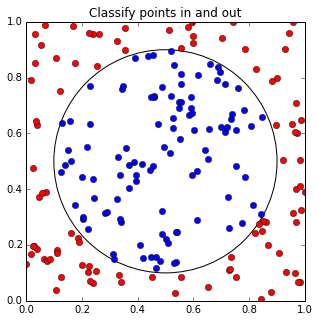

In [6]:
batch_xs, batch_ys = get_new_batch(200, radius)
fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range(batch_ys.shape[0]):
    if batch_ys[i] < 0.5:
        ax.plot(batch_xs[i,0], batch_xs[i,1],'ro')
    else:
        ax.plot(batch_xs[i,0], batch_xs[i,1],'bo')
    

circle1 = matplotlib.patches.Circle([0.5,0.5], 
                                    radius = radius, fill=False)
ax.add_artist(circle1)
ax.set_aspect(1)
ax.set_title('Classify points in and out')

plt.show()

Defining the network
-------------------




In [7]:

def weight_variable(shape):
    """ Create a weight variable with appropriate initialization. """
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """ Create a bias variable with appropriate initialization. """
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


In [8]:
# Number neurons by layer
neurons_layer1 = 8
neurons_layer2 = 10

# Input
x = tf.placeholder(tf.float32, [None, 2])

# Layer 1
W1 = weight_variable([2, neurons_layer1])
b1 = bias_variable([neurons_layer1])
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# Layer 2
W2 = weight_variable([neurons_layer1, neurons_layer2])
b2 = bias_variable([neurons_layer2])
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

# Layer 3
W3 = weight_variable([neurons_layer2, 1])
b3 = bias_variable([1])
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
output = tf.squeeze(y3)


In [ ]:
# References (given during training)
y_ = tf.placeholder(tf.float32, [None])

# Cost function
loss = tf.reduce_mean((y_ - output) * (y_ - output))
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(loss)

Training
-------------------

In [ ]:
sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
# Train
for i in range(10000):
    batch_xs, batch_ys = get_new_batch(20, radius)
    summary, vloss = sess.run([train_step, loss],
                              feed_dict = {x: batch_xs, y_: batch_ys})

print('Error rate: ', vloss)

Results
-------------

In [ ]:
batch_xs, batch_ys = get_new_batch(50, radius)
[yout] = sess.run([y3], feed_dict={x: batch_xs})


In [ ]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))
for i in range(yout.shape[0]):
    if yout[i] < 0.5:
        ax.plot(batch_xs[i,0],batch_xs[i,1],'ro')
    else:
        ax.plot(batch_xs[i,0],batch_xs[i,1],'bo')
    if batch_ys[i] < 0.5:
        ax2.plot(batch_xs[i,0],batch_xs[i,1],'ro')
    else:
        ax2.plot(batch_xs[i,0],batch_xs[i,1],'bo')
    

circle1 = matplotlib.patches.Circle([0.5,0.5], 
                                    radius = radius, fill=False)
circle2 = matplotlib.patches.Circle([0.5,0.5], 
                                    radius = radius, fill=False)
ax.add_artist(circle1)
ax2.add_artist(circle2)
ax.set_aspect(1)
ax2.set_aspect(1)
ax.set_title('Neural Network')
ax2.set_title('Reference')


plt.show()